# 05.03 레버리지와 아웃라이어

## 1. statsmodels 를 이용한 레버리지 계산

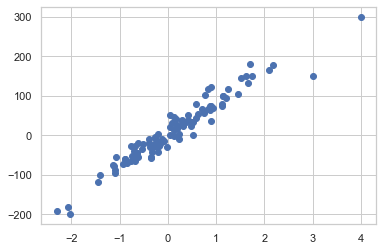

In [9]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])

X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)

### 1) 레버리지 높은 데이터(무리 지어 있지 않은) 포함해 OLS 분석

In [11]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.61e-61
Time:                        16:13:45   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

### 2) 레버리지 값 출력

- result.get_influence() 로 객체 생성
- 생성한 객체에서 hat_matrix_diag (영향도 행렬의 대각성분 = $h_{ii}$ = 레버리지값)

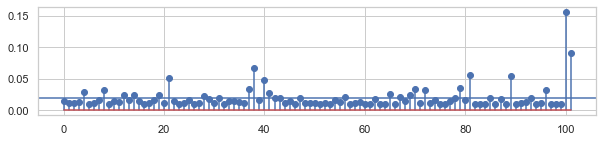

In [19]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

# 레버리지 평균
# 데이터 갯수 : 102, 모수 갯수(상수항 포함) : 2, 레버리지 평균 : 2/102 = 0.02

plt.figure(figsize=(10,2))
plt.stem(hat)
plt.axhline(0.02)

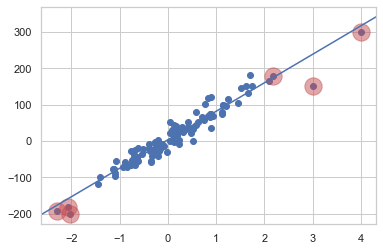

In [16]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)

### 3) statsmodels를 이용한 표준화 잔차 계산

    - regressionresult 객체 - resid 속성
    - regressionresult 객체 - resid_pearson 속성

<StemContainer object of 3 artists>

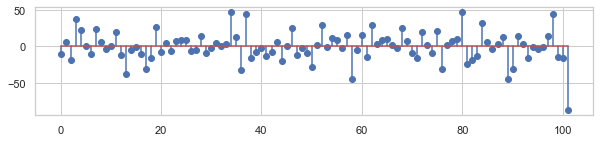

In [20]:
# 잔차 출력

plt.figure(figsize=(10,2))
plt.stem(result.resid)

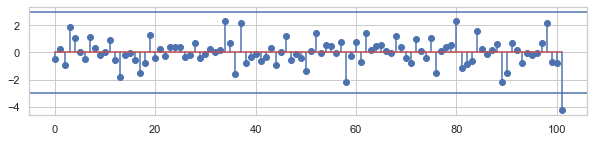

In [23]:
# 표준화 잔차 출력

plt.figure(figsize=(10,2))
plt.stem(result.resid_pearson)

plt.axhline(3)
plt.axhline(-3)

### 4) Cook's distance
    
    - 레버리지 vs (표준화잔차)**2 : plot_leverage_resid2
    - Cook's distance 출력 : influence_plot
    

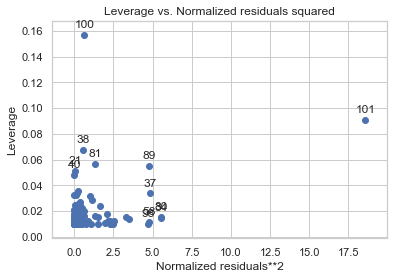

In [24]:
# 레버리지 vs (표준화잔차)**2

sm.graphics.plot_leverage_resid2(result)
plt.show()

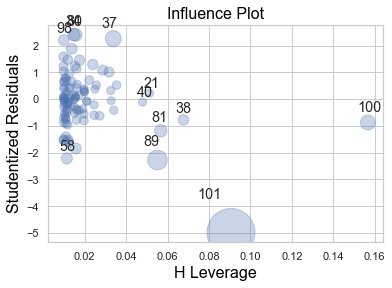

In [27]:
# 레버리지 vs 표준화 잔차

sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

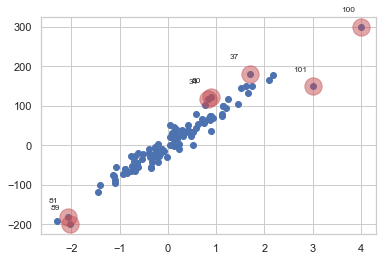

In [29]:
# Fox' recommendation outlier 기준 아웃라이어 표시

from statsmodels.graphics import utils


cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()